# Прогнозирование временных рядов

Какие компоненты обычно выделяют во временных рядах?
* Тренд
* Сезонность
* Цикл
* Ошибки

Какие особенности характерны для временных рядов?
* Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом.

Из каких слагаемых состоит модель `ARMA(p,q)`?
* Константа α
* Ошибка εt
* p предыдущих значений ряда с постоянными коэффициентами

Какие из параметров модели SARIMA настраиваются с помощью метода наименьших квадратов?
* Значение константы α
* Значения коэффициентов ϕ и θ перед предыдущими значениями ряда и предыдущими значениями ошибки

Какой эвристический метод позволяет выбрать начальное приближение для гиперпараметров p и P в сезонной модели ARIMA?
* Анализ частичной автокорреляционной функции

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:
```
monthly-milk-production.csv
```
Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции `monthrange` из пакета `calendar`). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

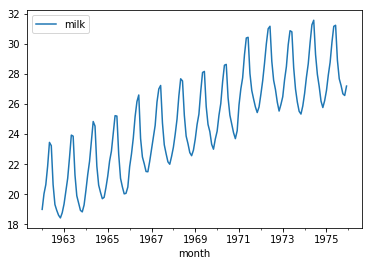

In [1]:
import pandas
from matplotlib import pyplot

%matplotlib inline

milk = pandas.read_csv('monthly-milk-production.csv', ';', index_col=['month'], parse_dates=['month'], dayfirst=True)
normalised_milk = pandas.DataFrame(milk['milk'] / milk.index.days_in_month)
normalised_milk.plot.line()
pyplot.show()

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:

```python
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
```

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции `shift`:

```python
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
```

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (`NaN`). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?
* Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

In [8]:
import statsmodels.api

daily_diff_1 = normalised_milk['milk'] - normalised_milk['milk'].shift(1)
_, p, _, _, _, _ = statsmodels.api.tsa.stattools.adfuller(daily_diff_1.dropna())
print(f'P-value (shift = 1): {p:.3f}')

daily_diff_12 = normalised_milk['milk'] - normalised_milk['milk'].shift(12)
_, p, _, _, _, _ = statsmodels.api.tsa.stattools.adfuller(daily_diff_12.dropna())
print(f'P-value (shift = 12): {p:.3f}')

daily_diff_12_1 = daily_diff_12 - daily_diff_12.shift(1)
_, p, _, _, _, _ = statsmodels.api.tsa.stattools.adfuller(daily_diff_12_1.dropna())
print(f'P-value (shift = 12 + shift = 1): {p:.3f}')

P-value (shift = 1): 0.064
P-value (shift = 12): 0.221
P-value (shift = 12 + shift = 1): 0.000


Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

```python
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)
```

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?
* 1

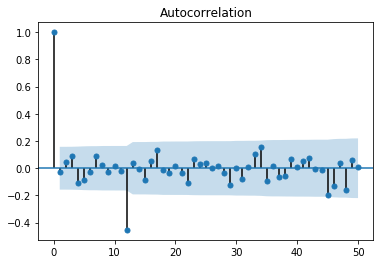

In [14]:
statsmodels.api.graphics.tsa.plot_acf(daily_diff_12_1.dropna().values.squeeze(), lags=50)
pyplot.show()

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

```python
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)
```

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?
* 0

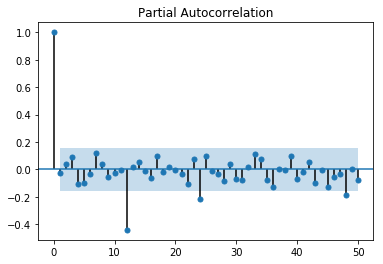

In [15]:
statsmodels.api.graphics.tsa.plot_pacf(daily_diff_12_1.dropna().values.squeeze(), lags=50)
pyplot.show()